In [ ]:
!pip -qqq install datasets
!pip -qqq install textstat
!pip -qqq install stylecloud
!pip -qqq install seaborn
!pip -qqq install nltk
!pip -qqq install emoji
!pip -qqq install scikit-learn
!pip -qqq install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.1 MB/s eta 0:00:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import nltk
import emoji
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

EDA

In [ ]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion", "split")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
df = ds['train'].to_pandas()
df.isna().sum()

,0
text,0
label,0


In [ ]:
import textstat

# Показать количество примеров в каждом разделе
print(f"Количество примеров в обучающем наборе: {len(ds['train'])}")
print(f"Количество примеров в валидационном наборе: {len(ds['validation'])}")
print(f"Количество примеров в тестовом наборе: {len(ds['test'])}")

# Показать среднюю длину текста в каждом разделе
train_texts = [example['text'] for example in ds['train']]
validation_texts = [example['text'] for example in ds['validation']]
test_texts = [example['text'] for example in ds['test']]

average_train_length = sum(len(text.split()) for text in train_texts) / len(train_texts)
average_validation_length = sum(len(text.split()) for text in validation_texts) / len(validation_texts)
average_test_length = sum(len(text.split()) for text in test_texts) / len(test_texts)

print(f"Средняя длина текста в обучающем наборе: {average_train_length:.2f} слов")
print(f"Средняя длина текста в валидационном наборе: {average_validation_length:.2f} слов")
print(f"Средняя длина текста в тестовом наборе: {average_test_length:.2f} слов")

# Показать среднюю сложность текста в каждом разделе
average_train_readability = sum(textstat.flesch_reading_ease(text) for text in train_texts) / len(train_texts)
average_validation_readability = sum(textstat.flesch_reading_ease(text) for text in validation_texts) / len(validation_texts)
average_test_readability = sum(textstat.flesch_reading_ease(text) for text in test_texts) / len(test_texts)

print(f"Средняя сложность текста в обучающем наборе: {average_train_readability:.2f}")
print(f"Средняя сложность текста в валидационном наборе: {average_validation_readability:.2f}")
print(f"Средняя сложность текста в тестовом наборе: {average_test_readability:.2f}")
from collections import Counter

# Функция для получения самых частовстречающихся слов
def get_most_common_words(texts, n=10):
    all_words = ' '.join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Показать самые частовстречающиеся слова в каждом разделе
print("Самые частовстречающиеся слова в обучающем наборе:")
print(get_most_common_words(train_texts))

print("\nСамые частовстречающиеся слова в валидационном наборе:")
print(get_most_common_words(validation_texts))

print("\nСамые частовстречающиеся слова в тестовом наборе:")
print(get_most_common_words(test_texts))

# Проверка сбалансированности классов в каждом наборе
def check_class_balance(dataset):
    label_names = dataset.features['label'].names
    label_counts = Counter(dataset['label'])
    total = sum(label_counts.values())
    balance_info = {}
    for label in range(len(label_names)):
        count = label_counts.get(label, 0)
        balance_info[label_names[label]] = (count, count / total if total > 0 else 0)
    return balance_info

def print_class_balance(balance_info, dataset_name):
    print(f"\nСбалансированность классов в {dataset_name} наборе:")
    for label, (count, proportion) in balance_info.items():
        print(f"Класс {label}: {count} примеров, {proportion:.2%} от общего числа")

train_balance = check_class_balance(ds['train'])
validation_balance = check_class_balance(ds['validation'])
test_balance = check_class_balance(ds['test'])

print_class_balance(train_balance, "обучающем")
print_class_balance(validation_balance, "валидационном")
print_class_balance(test_balance, "тестовом")


Количество примеров в обучающем наборе: 16000
Количество примеров в валидационном наборе: 2000
Количество примеров в тестовом наборе: 2000
Средняя длина текста в обучающем наборе: 19.17 слов
Средняя длина текста в валидационном наборе: 18.87 слов
Средняя длина текста в тестовом наборе: 19.15 слов
Средняя сложность текста в обучающем наборе: 73.46
Средняя сложность текста в валидационном наборе: 73.72
Средняя сложность текста в тестовом наборе: 74.20
Самые частовстречающиеся слова в обучающем наборе:
[('i', 25859), ('feel', 11183), ('and', 9589), ('to', 8972), ('the', 8370), ('a', 6200), ('feeling', 5112), ('that', 5112), ('of', 4990), ('my', 4283)]

Самые частовстречающиеся слова в валидационном наборе:
[('i', 3185), ('feel', 1361), ('and', 1177), ('to', 1114), ('the', 1013), ('a', 782), ('feeling', 673), ('of', 597), ('that', 589), ('my', 506)]

Самые частовстречающиеся слова в тестовом наборе:
[('i', 3198), ('feel', 1394), ('and', 1230), ('to', 1122), ('the', 1079), ('a', 766), ('fee

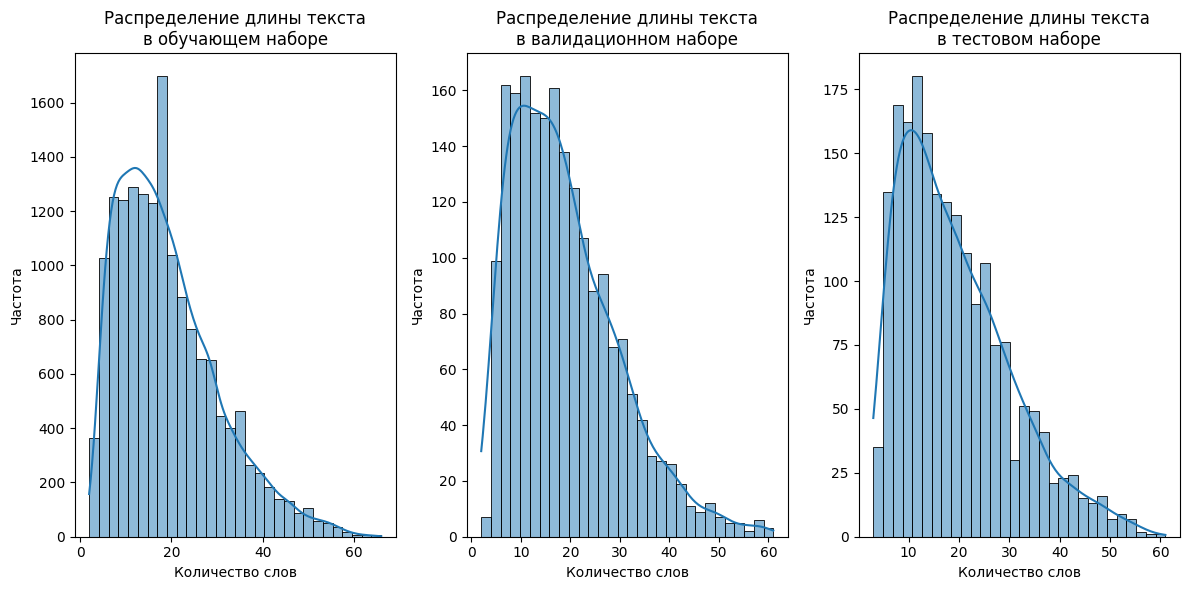

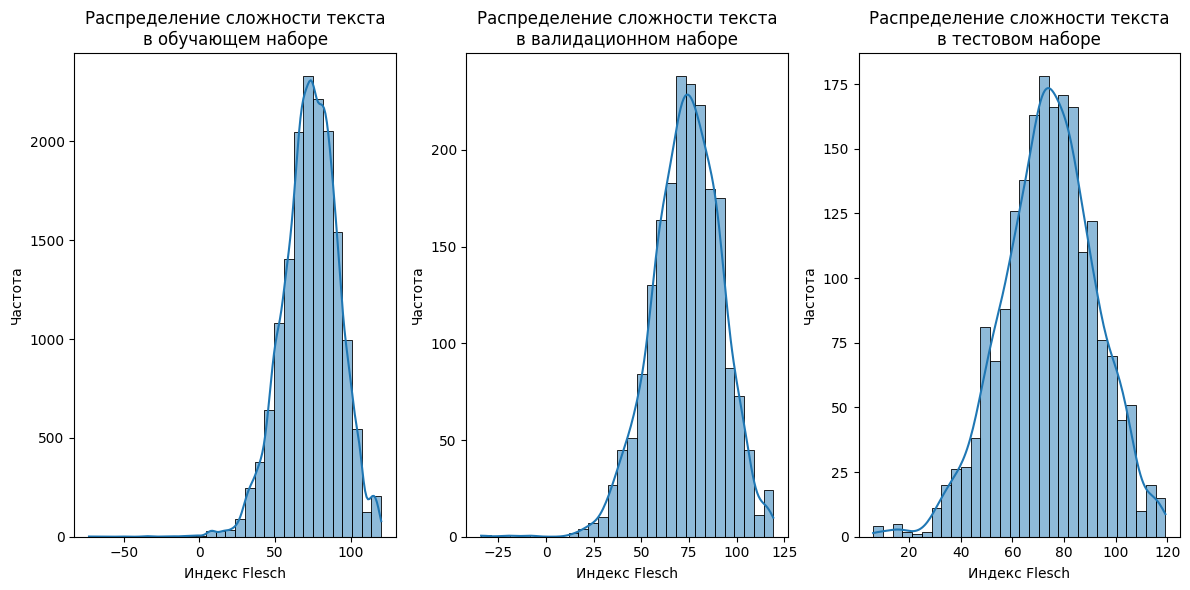

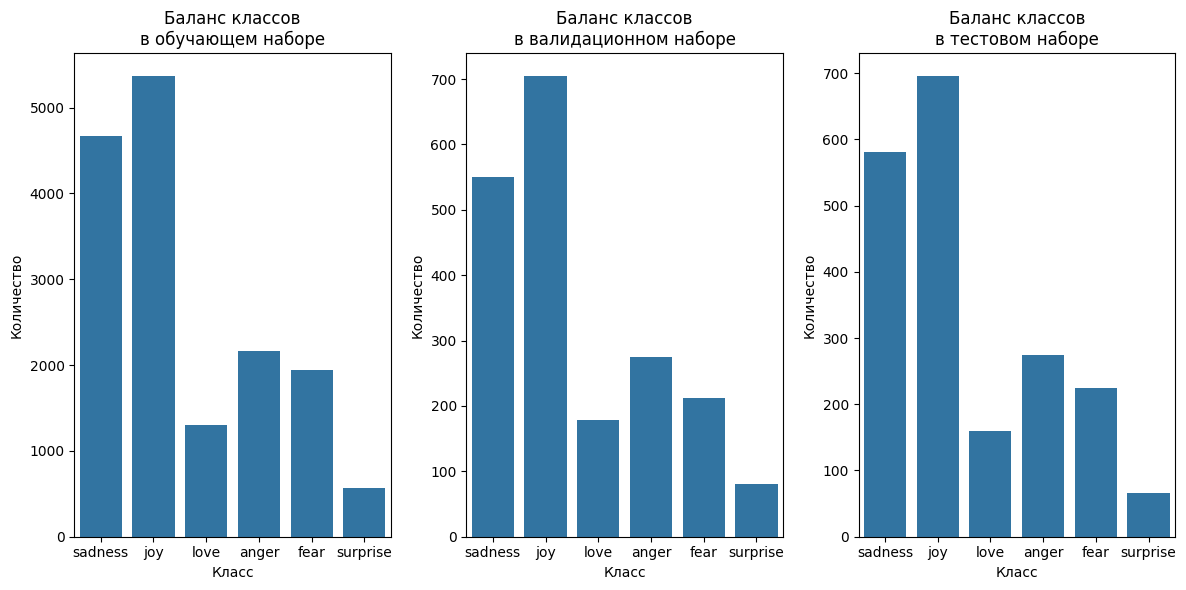

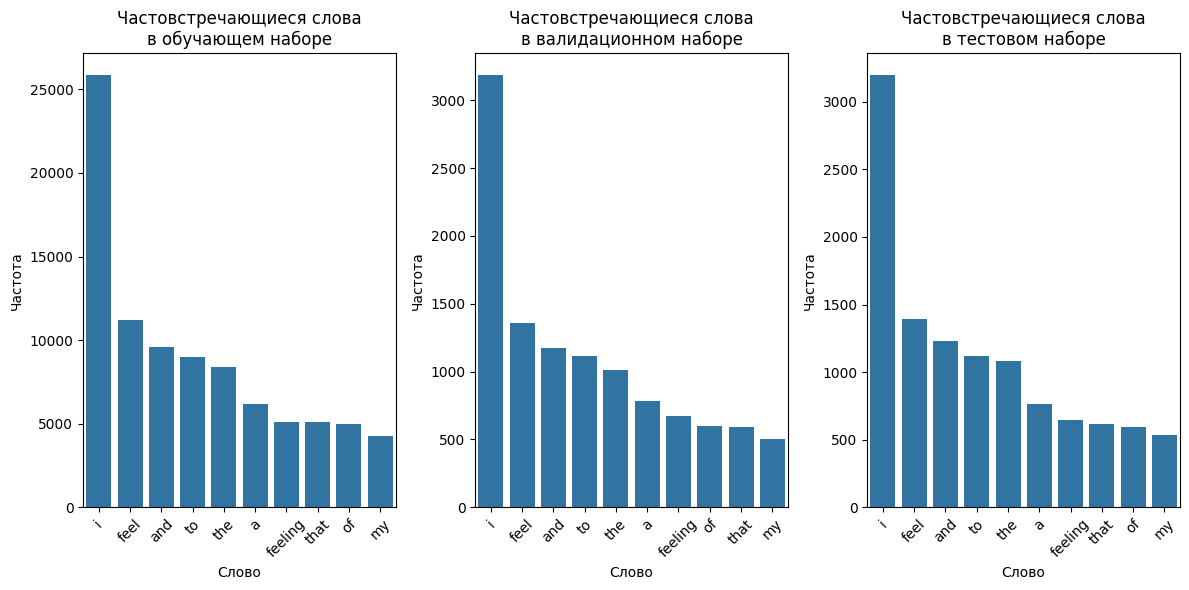

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения длины текста в каждом разделе
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot([len(text.split()) for text in train_texts], bins=30, kde=True)
plt.title('Распределение длины текста\nв обучающем наборе')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot([len(text.split()) for text in validation_texts], bins=30, kde=True)
plt.title('Распределение длины текста\nв валидационном наборе')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot([len(text.split()) for text in test_texts], bins=30, kde=True)
plt.title('Распределение длины текста\nв тестовом наборе')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Визуализация распределения сложности текста в каждом разделе
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot([textstat.flesch_reading_ease(text) for text in train_texts], bins=30, kde=True)
plt.title('Распределение сложности текста\nв обучающем наборе')
plt.xlabel('Индекс Flesch')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot([textstat.flesch_reading_ease(text) for text in validation_texts], bins=30, kde=True)
plt.title('Распределение сложности текста\nв валидационном наборе')
plt.xlabel('Индекс Flesch')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot([textstat.flesch_reading_ease(text) for text in test_texts], bins=30, kde=True)
plt.title('Распределение сложности текста\nв тестовом наборе')
plt.xlabel('Индекс Flesch')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


# Визуализация баланса классов в каждом разделе
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=list(train_balance.keys()), y=[count for count, _ in train_balance.values()])
plt.title('Баланс классов\nв обучающем наборе')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
sns.barplot(x=list(validation_balance.keys()), y=[count for count, _ in validation_balance.values()])
plt.title('Баланс классов\nв валидационном наборе')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
sns.barplot(x=list(test_balance.keys()), y=[count for count, _ in test_balance.values()])
plt.title('Баланс классов\nв тестовом наборе')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Визуализация частоты самых частовстречающихся слов в каждом разделе
plt.figure(figsize=(12, 6))

train_common_words, train_counts = zip(*get_most_common_words(train_texts))
plt.subplot(1, 3, 1)
sns.barplot(x=train_common_words, y=train_counts)
plt.title('Частовстречающиеся слова\nв обучающем наборе')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.xticks(rotation=45)

validation_common_words, validation_counts = zip(*get_most_common_words(validation_texts))
plt.subplot(1, 3, 2)
sns.barplot(x=validation_common_words, y=validation_counts)
plt.title('Частовстречающиеся слова\nв валидационном наборе')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.xticks(rotation=45)

test_common_words, test_counts = zip(*get_most_common_words(test_texts))
plt.subplot(1, 3, 3)
sns.barplot(x=test_common_words, y=test_counts)
plt.title('Частовстречающиеся слова\nв тестовом наборе')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



   - Средняя длина текста в словах практически одинакова во всех наборах: около 19 слов. Это говорит о консистентности данных по длине текстов.

   - Средняя сложность текста немного увеличивается от обучающего к тестовому набору (от 73.46 до 74.20). Это может указывать на небольшую разницу в сложности текстов между наборами, но в целом сложность остаётся стабильной.

   - Наиболее часто встречающиеся слова в наборах — это общие слова, такие как "i", "feel", "and", "to", что типично для текстов, выражающих эмоции. Это указывает на то, что тексты, вероятно, содержат много личных высказываний и описаний чувств. Посмотрим, что будет после удаления стоп слов.

   - Классы в обучающем наборе неравномерно распределены. Наиболее представленный класс — "joy" (33.51%), а наименее — "surprise" (3.57%).
   - Все наборы демонстрируют схожую диспропорцию в распределении классов, что может повлиять на обучение модели и её способность правильно классифицировать менее представленные классы.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

def clean_data(texts):
    cleaned_texts = []
    for text in texts:
        # Remove extra spaces
        text = ' '.join(text.split())
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
        cleaned_texts.append(text)
    return cleaned_texts

def remove_stopwords(texts):
    stop_words = set(stopwords.words('english'))
    filtered_texts = []
    for text in texts:
        words = word_tokenize(text)
        filtered_text = ' '.join([word for word in words if word.lower() not in stop_words])
        filtered_texts.append(filtered_text)
    return filtered_texts

def lemmatize_texts(texts):
    lemmatizer = WordNetLemmatizer()
    lemmatized_texts = []
    for text in texts:
        words = word_tokenize(text)
        lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
        lemmatized_texts.append(lemmatized_text)
    return lemmatized_texts

def stem_texts(texts):
    stemmer = PorterStemmer()
    stemmed_texts = []
    for text in texts:
        words = word_tokenize(text)
        stemmed_text = ' '.join([stemmer.stem(word) for word in words])
        stemmed_texts.append(stemmed_text)
    return stemmed_texts

# Apply the cleaning function to each dataset
train_texts_cleaned = clean_data(train_texts)
validation_texts_cleaned = clean_data(validation_texts)
test_texts_cleaned = clean_data(test_texts)

# Remove stopwords
train_texts_no_stopwords = remove_stopwords(train_texts_cleaned)
validation_texts_no_stopwords = remove_stopwords(validation_texts_cleaned)
test_texts_no_stopwords = remove_stopwords(test_texts_cleaned)

# Lemmatize texts
train_texts_lemmatized = lemmatize_texts(train_texts_no_stopwords)
validation_texts_lemmatized = lemmatize_texts(validation_texts_no_stopwords)
test_texts_lemmatized = lemmatize_texts(test_texts_no_stopwords)

# Stem texts
train_texts_stemmed = stem_texts(train_texts_no_stopwords)
validation_texts_stemmed = stem_texts(validation_texts_no_stopwords)
test_texts_stemmed = stem_texts(test_texts_no_stopwords)

# Create four sets for each dataset
train_sets = {
    'original': train_texts,
    'cleaned': train_texts_cleaned,
    'lemmatized': train_texts_lemmatized,
    'stemmed': train_texts_stemmed
}

validation_sets = {
    'original': validation_texts,
    'cleaned': validation_texts_cleaned,
    'lemmatized': validation_texts_lemmatized,
    'stemmed': validation_texts_stemmed
}

test_sets = {
    'original': test_texts,
    'cleaned': test_texts_cleaned,
    'lemmatized': test_texts_lemmatized,
    'stemmed': test_texts_stemmed
}
sets = {"train": train_sets, "val": validation_sets, "test": test_sets}

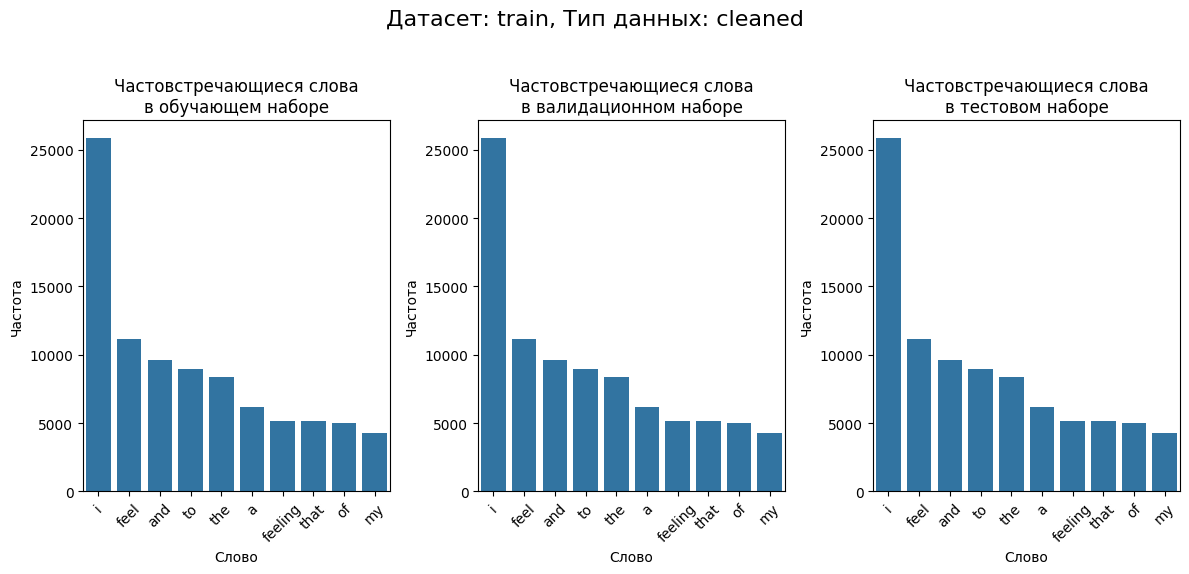

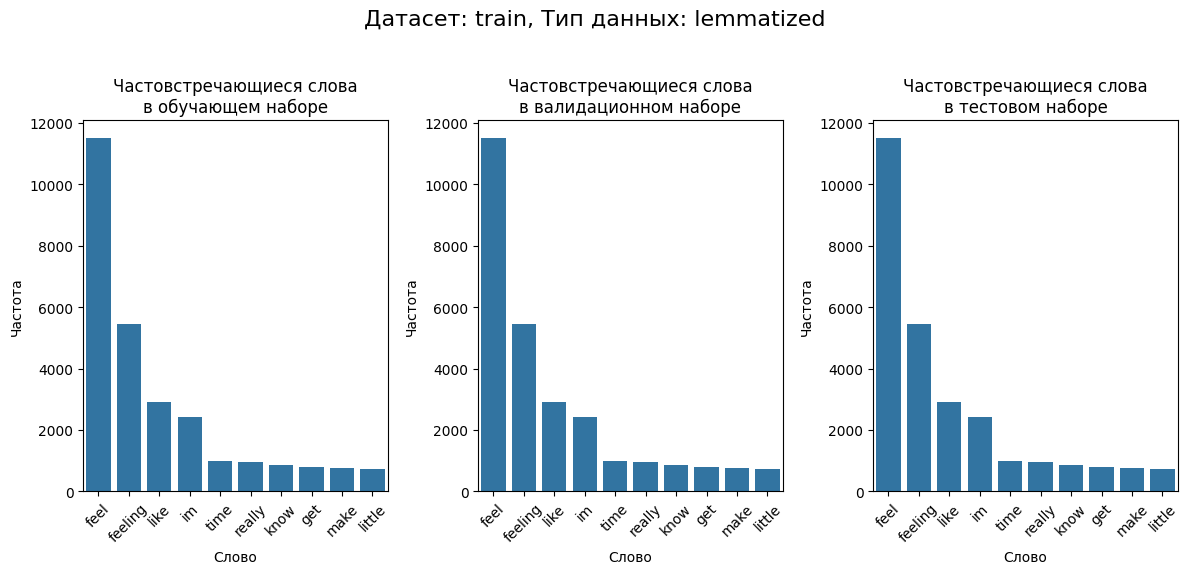

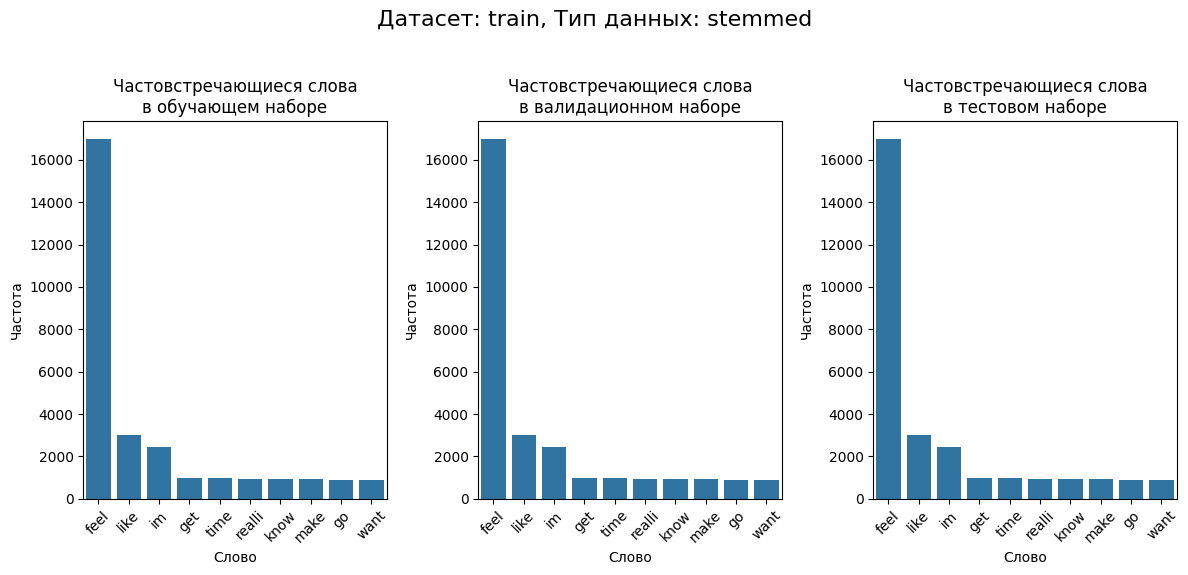

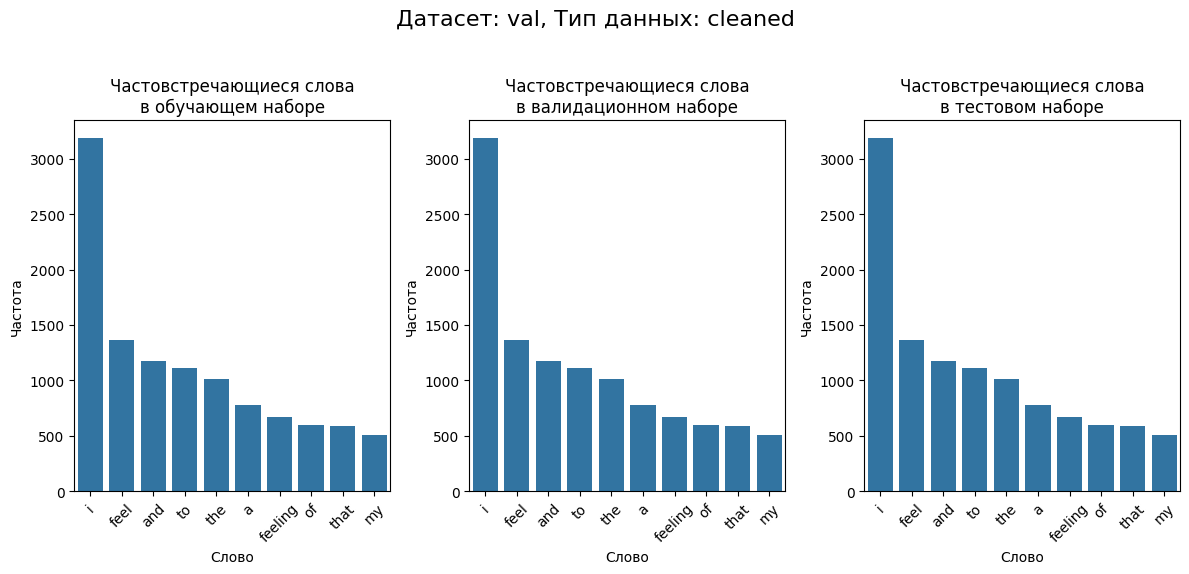

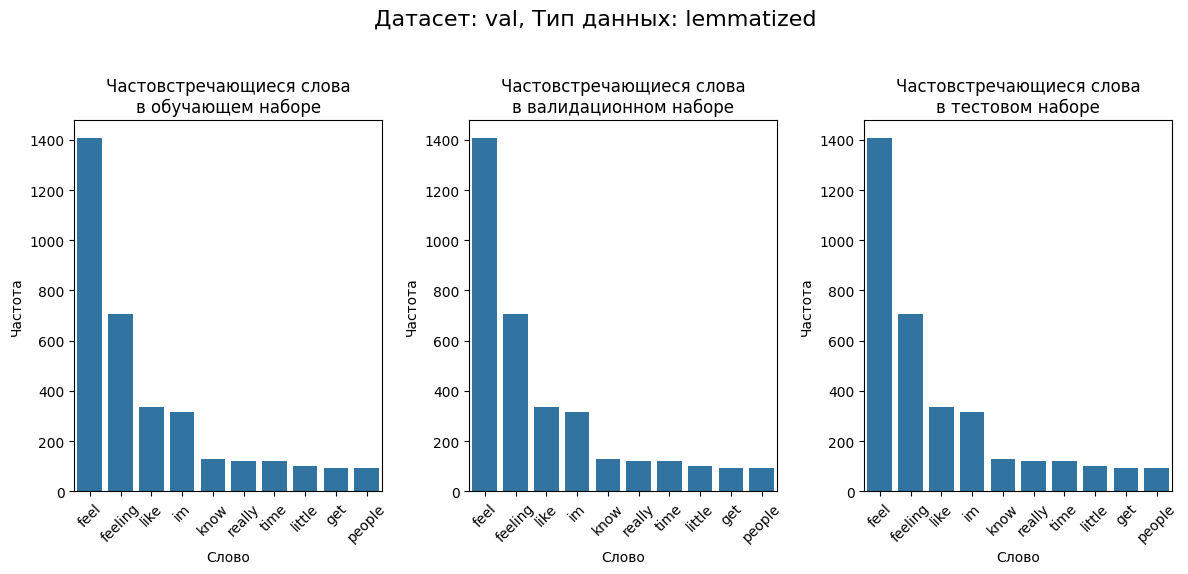

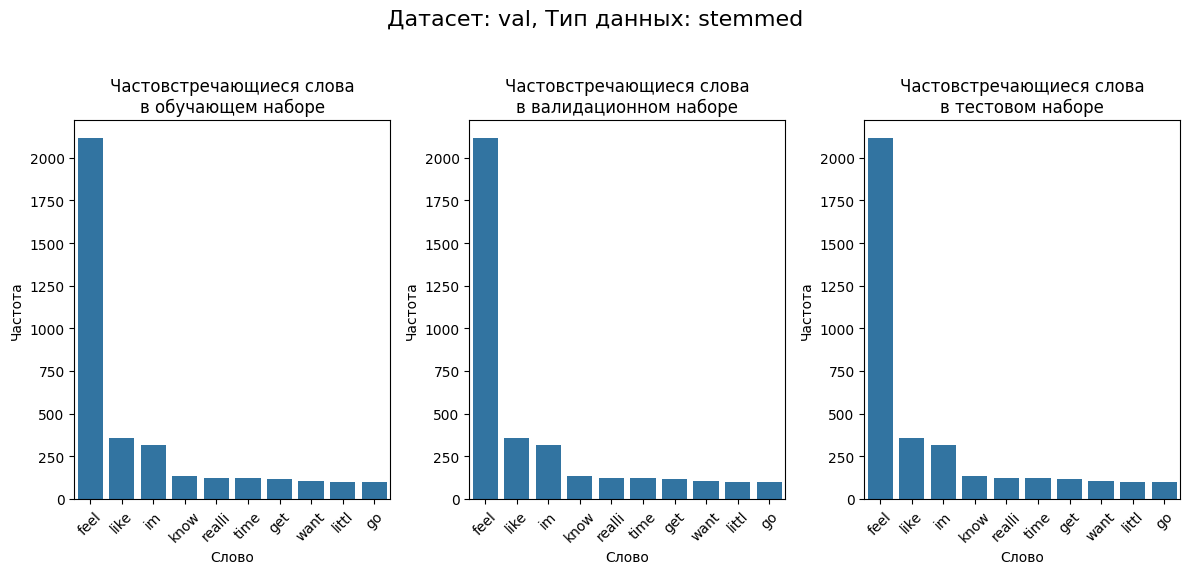

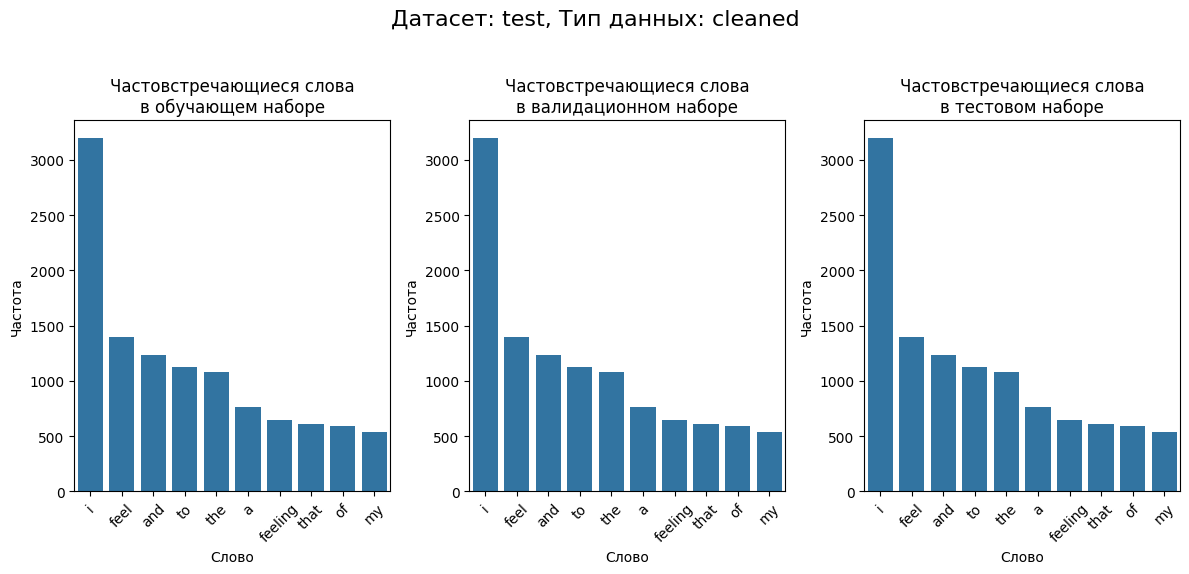

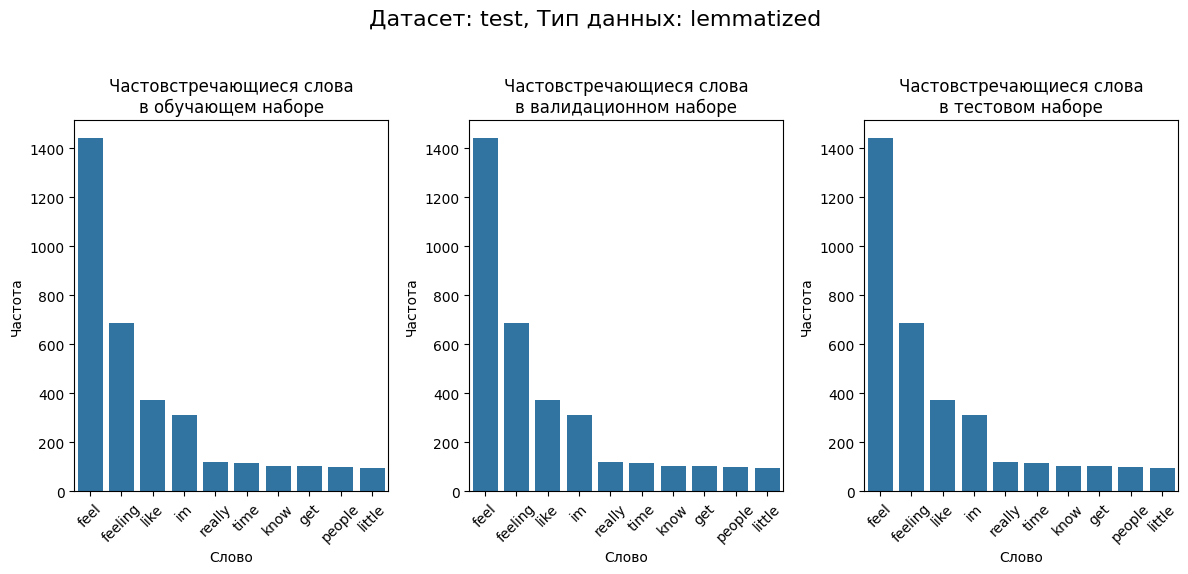

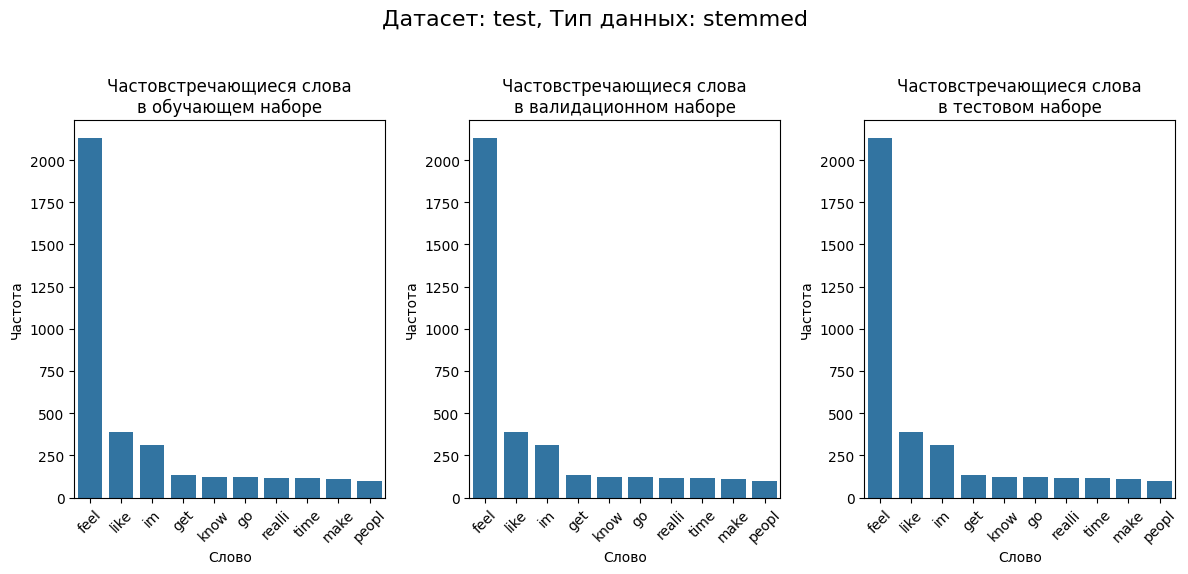

In [ ]:

# Визуализация частоты самых частовстречающихся слов в каждом разделе

for s_name, s in sets.items():
    for d_name, d in s.items():
        if not d_name == "original":
            plt.figure(figsize=(12, 6))
            plt.suptitle(f'Датасет: {s_name}, Тип данных: {d_name}', fontsize=16)

            train_common_words, train_counts = zip(*get_most_common_words(d))
            plt.subplot(1, 3, 1)
            sns.barplot(x=train_common_words, y=train_counts)
            plt.title('Частовстречающиеся слова\nв обучающем наборе')
            plt.xlabel('Слово')
            plt.ylabel('Частота')
            plt.xticks(rotation=45)

            validation_common_words, validation_counts = zip(*get_most_common_words(d))
            plt.subplot(1, 3, 2)
            sns.barplot(x=validation_common_words, y=validation_counts)
            plt.title('Частовстречающиеся слова\nв валидационном наборе')
            plt.xlabel('Слово')
            plt.ylabel('Частота')
            plt.xticks(rotation=45)

            test_common_words, test_counts = zip(*get_most_common_words(d))
            plt.subplot(1, 3, 3)
            sns.barplot(x=test_common_words, y=test_counts)
            plt.title('Частовстречающиеся слова\nв тестовом наборе')
            plt.xlabel('Слово')
            plt.ylabel('Частота')
            plt.xticks(rotation=45)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()


- в разных выборках частота слов почти не отличается при олинаковой обработке.
- При стемминге как будто очень часто встрачется feel, так каак туда заносятся все возможные изменения этого слова. Это подтверждает гипотезу о том, что в данных много про чувства, что должно помогать модели опеределять настрой текста.

## Выделям новые фичи
## Эмодзи

In [ ]:
import emoji

def count_emojis_in_text(text):
    # Считаем количество эмодзи в тексте
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

def count_emojis_in_dataset(dataset):
    # Считаем количество эмодзи в каждом тексте датасета
    return sum(count_emojis_in_text(text) for text in dataset['text'])

# Пример использования с датасетом ds
emoji_count = count_emojis_in_dataset(ds['train'])
print(f"Количество эмодзи в тренировочном наборе: {emoji_count}")

Количество эмодзи в тренировочном наборе: 0


- То есть фичу с переводом эмодзи в текст или просто их подсчетом нет смысла внедрять, ибо их простот нет.

## Доля слов в верхнем регистре

In [ ]:
uppercase_word_count = sum(1 for text in ds['train']['text'] for word in text.split() if word.isupper())
print(f"Количество слов в верхнем регистре в тренировочном наборе: {uppercase_word_count}")


Количество слов в верхнем регистре в тренировочном наборе: 0


## Количество вопросительных и восклицательных знаков

In [ ]:
question_count = sum(text.count('?') for text in ds['train']['text'])
exclamation_count = sum(text.count('!') for text in ds['train']['text'])

print(f"Количество вопросительных знаков в тренировочном наборе: {question_count}")
print(f"Количество восклицательных знаков в тренировочном наборе: {exclamation_count}")


Количество вопросительных знаков в тренировочном наборе: 0
Количество восклицательных знаков в тренировочном наборе: 0


# embeddings

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.models import FastText

# Загрузка предобученной модели Word2Vec
pretrained_word2vec_model = api.load("word2vec-google-news-300")

# Загрузка предобученной модели FastText
pretrained_fasttext_model = api.load("fasttext-wiki-news-subwords-300")

def get_one_hot_encodings(texts):
    encoder = OneHotEncoder(sparse_output=False)
    text_data = [[word] for text in texts for word in text.split()]
    encoder.fit(text_data)
    return [encoder.transform([[word] for word in text.split()]) for text in texts]

def get_tfidf_encodings(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix.toarray()

def train_word2vec(texts, vector_size=100, window=5, min_count=1, workers=4):
    tokenized_texts = [text.split() for text in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

def train_fasttext(texts, vector_size=100, window=5, min_count=1, workers=4):
    tokenized_texts = [text.split() for text in texts]
    model = FastText(sentences=tokenized_texts, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

for set_name, dataset in sets.items():
    for version, texts in dataset.items():
        # One hot encoding
        one_hot_encodings = get_one_hot_encodings(texts)
        sets[set_name][f'{version}_one_hot'] = one_hot_encodings

        # TF-IDF encoding
        tfidf_encodings = get_tfidf_encodings(texts)
        sets[set_name][f'{version}_tfidf'] = tfidf_encodings

        # Word2Vec
        word2vec_model = train_word2vec(texts)
        word2vec_encodings = [word2vec_model.wv[text.split()] for text in texts]
        sets[set_name][f'{version}_word2vec'] = word2vec_encodings

        # Использование предобученной модели Word2Vec
        pretrained_word2vec_encodings = [
            [pretrained_word2vec_model[word] for word in text.split() if word in pretrained_word2vec_model]
            for text in texts
        ]
        sets[set_name][f'{version}_pretrained_word2vec'] = pretrained_word2vec_encodings

        # FastText
        fasttext_model = train_fasttext(texts)
        fasttext_encodings = [fasttext_model.wv[text.split()] for text in texts]
        sets[set_name][f'{version}_fasttext'] = fasttext_encodings

        # Использование предобученной модели FastText
        pretrained_fasttext_encodings = [
            [pretrained_fasttext_model[word] for word in text.split() if word in pretrained_fasttext_model]
            for text in texts
        ]
        sets[set_name][f'{version}_pretrained_fasttext'] = pretrained_fasttext_encodings

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


KeyboardInterrupt: 